# Solve and Plot ODE Solution

In [1]:
from sympy import *
from matplotlib import pyplot as plt
#import seaborn as sns
import numpy as np

In [2]:
m = float(input('Mass:\n> '))
k = float(input('Drag Coefficient:\n> '))
g = 9.8

print("Mass: " + str(m))
print("Drag Coefficient: " + str(k))
print("g: " + str(g))

Mass: 5.0
Drag Coefficient: 0.1
g: 9.8


In [5]:
#f = Function('f')
f1 = g * m
t = Symbol('t')
v = Function('v')

equation = dsolve(f1 - k * v(t) - m * Derivative(v(t)), 0)

C1 = Symbol('C1')
C1_ic = solve(equation.rhs.subs({t:0}),C1)[0]

equation = equation.subs({C1:C1_ic})

print(C1_ic)
display(equation)

-490.000000000000


Eq(v(t), 490.0 - 490.0*exp(-0.02*t))

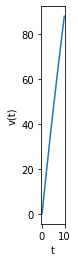

In [6]:
# make a numpy-ready function from the sympy results
func = lambdify(t, equation.rhs,'numpy')
xvals = np.arange(0,10,.1)
yvals = func(xvals)

# make figure
fig, ax = plt.subplots(1,1,subplot_kw=dict(aspect='equal'))     
ax.plot(xvals, yvals)
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
plt.show()